In [7]:
import pandas as pd
notas = pd.read_csv("ratings.csv")
notas.head(6)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400


In [8]:
notas.shape

(100836, 4)

In [11]:
notas.columns = ["usuarioID", "filmeID", "nota", "momento"]
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
notas['nota'] #aqui vira uma série 

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [13]:
notas['nota'].unique() #valores atribuídos às notas

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [15]:
notas['nota'].value_counts() #conta quantas vezes cada nota aparece

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [19]:
notas['nota'].mean() #média

3.501556983616962

In [22]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<AxesSubplot:>

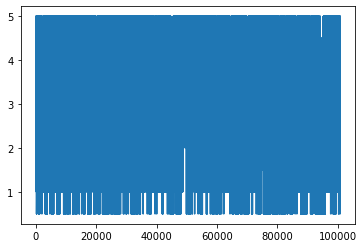

In [25]:
notas.nota.plot()

<AxesSubplot:ylabel='Frequency'>

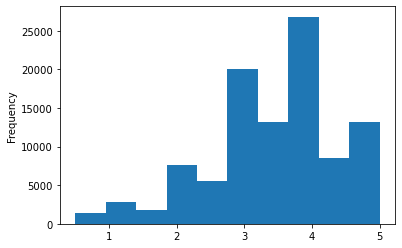

In [28]:
notas.nota.plot(kind='hist')

In [33]:
print("Mediana =", notas.nota.median())
print("Média =", notas.nota.mean())

Mediana = 3.5
Média = 3.501556983616962


In [35]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

C:\Users\Intel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

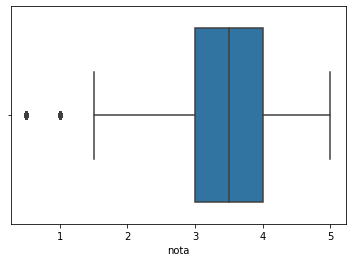

In [39]:
import seaborn as sns

sns.boxplot(notas.nota)

In [46]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeID', "titulo", "generos"]
filmes.head(5)


,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [49]:
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [51]:
notas.query('filmeID==1')

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [59]:
notas.query("filmeID==1").nota #traz a série da nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

# Analisando

In [62]:
print("Nota média de Toy Story =", notas.query("filmeID==1").nota.mean()) #media das notas do filme 1

Nota média de Toy Story = 3.9209302325581397


In [64]:
notas.query("filmeID==2").nota.mean() #fazer um por um seria mto trabalhoso

3.4318181818181817

In [66]:
notas.groupby("filmeID")

In [72]:
notas.groupby("filmeID").mean() #traz a media de cada coluna agrupada

,usuarioID,nota,momento
filmeID,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [75]:
notas.groupby("filmeID").nota.mean() #media apenas da nota

filmeID
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [77]:
notas.groupby("filmeID").mean().nota

filmeID
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [82]:
medias_por_filme = notas.groupby("filmeID").mean()["nota"]
medias_por_filme.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

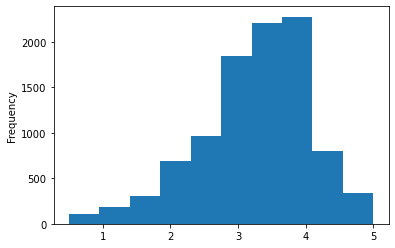

In [85]:
medias_por_filme.plot(kind='hist') #biblioteca pandas

C:\Users\Intel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

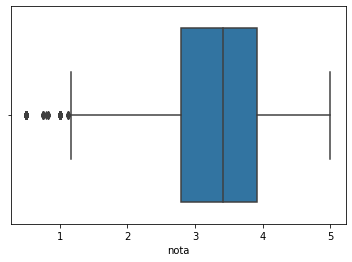

In [96]:
sns.boxplot(medias_por_filme)

In [89]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<AxesSubplot:ylabel='nota'>

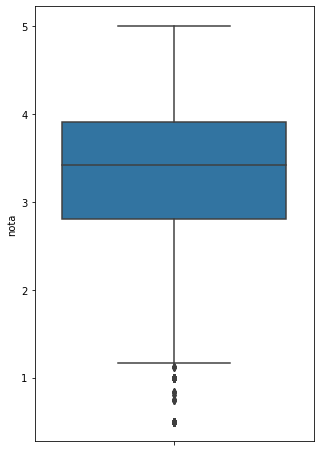

In [213]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8)) #mudo a largura das figuras
sns.boxplot(y=medias_por_filme) #mudo para a vertical

C:\Users\Intel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

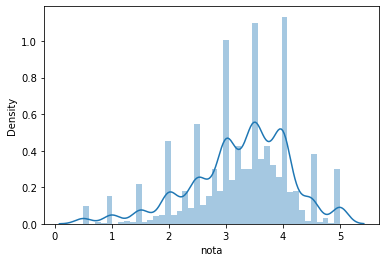

In [91]:
sns.distplot(medias_por_filme) #histograma no seaborn. ele mesmo decide em quantas colunas dividir

C:\Users\Intel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

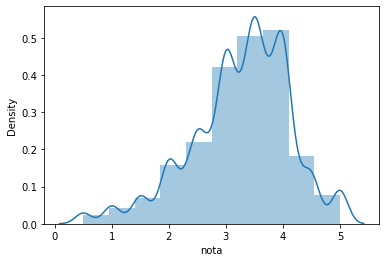

In [93]:
sns.distplot(medias_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

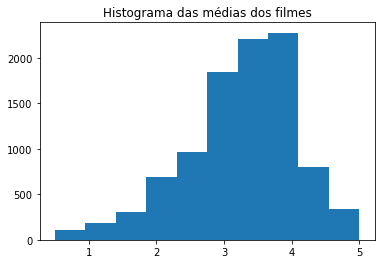

In [100]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

In [105]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [107]:
tmdb.original_language.unique() #traz as linguas nessa coluna

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [132]:
qlinguas = tmdb.original_language.value_counts() #me retorna uma série. as linguas são os índices
qlinguas

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [126]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object')

In [127]:
tmdb["original_language"].value_counts().values 

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1], dtype=int64)

<AxesSubplot:>

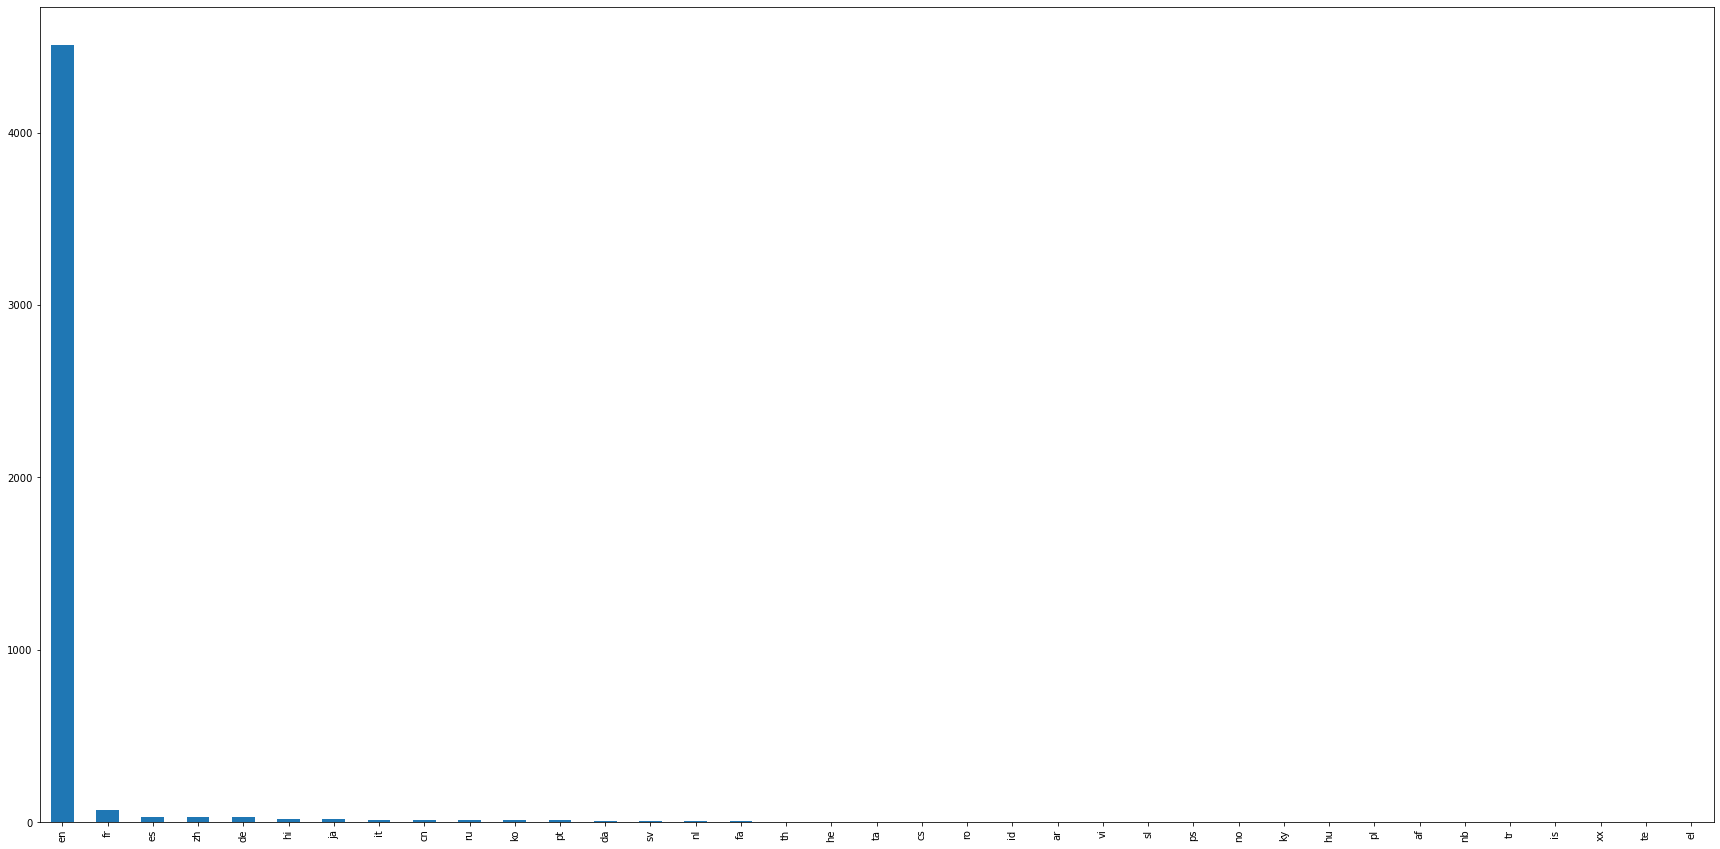

In [133]:
plt.figure(figsize=(30,15))
qlinguas.plot(kind='bar')

In [134]:
dflinguas = tmdb.original_language.value_counts().to_frame() #transformo a série em dataFrame
dflinguas

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


In [140]:
contagem_lingua = tmdb.original_language.value_counts().to_frame().reset_index() #reseto o index e tenho 2 colunas
contagem_lingua.columns = ["original_language", "total"]
contagem_lingua.head()


,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<AxesSubplot:>

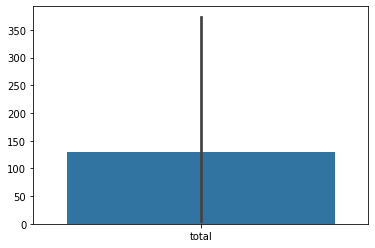

In [145]:
sns.barplot(data = contagem_lingua)

<AxesSubplot:xlabel='original_language', ylabel='total'>

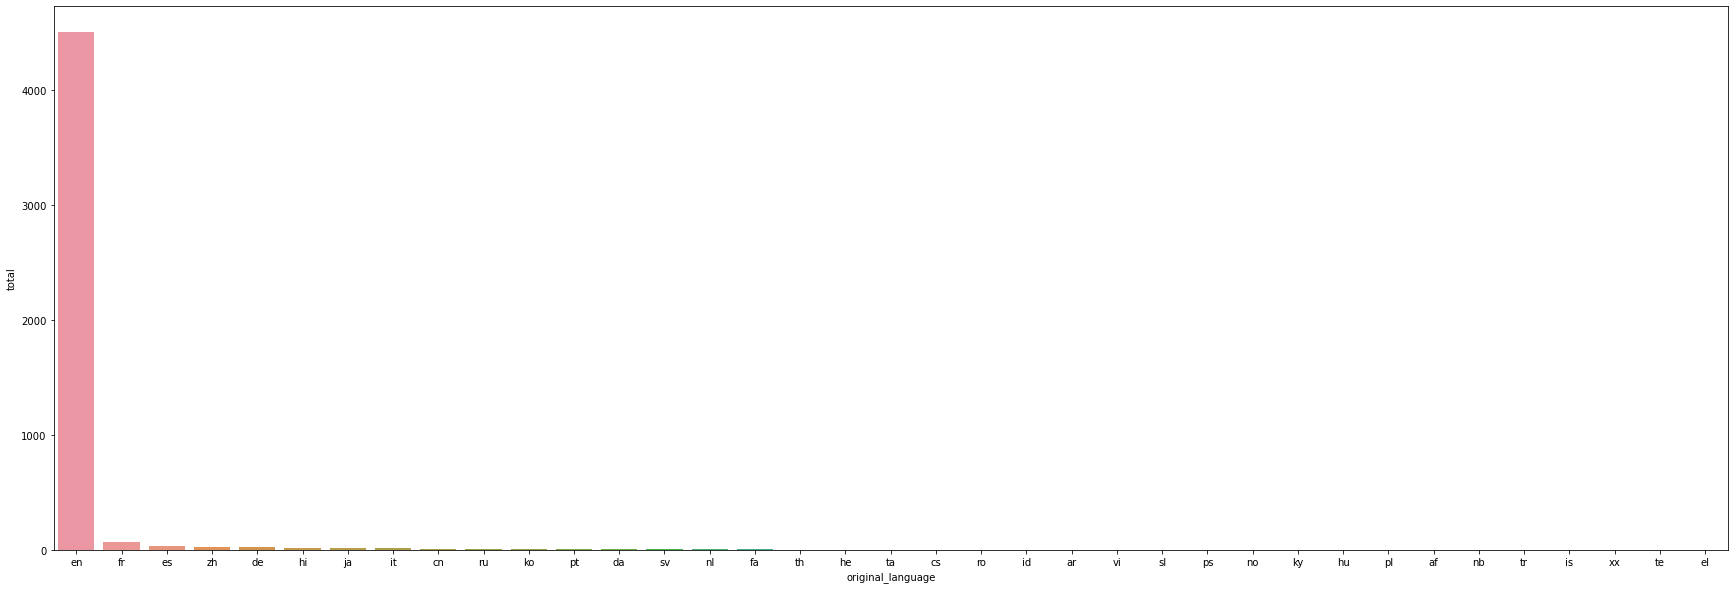

In [148]:
plt.figure(figsize=(30,10))
sns.barplot(x="original_language", y ="total", data = contagem_lingua) #com série eu nao consigo nominar o X e Y, no dataFrame sim.

<Figure size 3240x720 with 0 Axes>

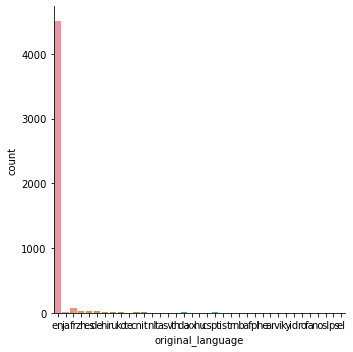

In [152]:
plt.figure(figsize=(45,10))
sns.catplot(x = "original_language", kind="count", data = tmdb) #aqui não preciso contar, transformar em dataFrame. 
#automaticamente ele vai me contar os valores de original language

#no exemplo do prof, a versao do seaborn dele é mais antiga entao ele faz
# print(sns.__version__)
# !pip install seaborn ==0.9.0
# import seaborn as sns

([<matplotlib.patches.Wedge at 0x29982e7e7c0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

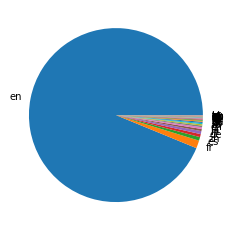

In [156]:
plt.pie(contagem_lingua["total"], labels = contagem_lingua["original_language"])

In [170]:
ti = tmdb.original_language.value_counts().loc["en"]
ti

4505

In [168]:
total_lingua = tmdb.original_language.value_counts()
total_lingua.head()


en    4505
fr      70
es      32
zh      27
de      27
Name: original_language, dtype: int64

In [167]:
total_ingles = total_lingua.loc["en"] #localiza o indíce EN
total_ingles

4505

In [171]:
total_geral = total_lingua.sum()
total_geral

4803

In [174]:
total_resto = total_geral - total_ingles
total_resto

298

In [178]:
dados = {
    'lingua' : ['en', 'outros'],
    'total' : [total_ingles, total_resto]
}

In [180]:
dados

{'lingua': ['en', 'outros'], 'total': [4505, 298]}

In [183]:
pd.DataFrame(dados)

,lingua,total
0,en,4505
1,outros,298


In [186]:
dados = pd.DataFrame(dados)
dados

,lingua,total
0,en,4505
1,outros,298


([<matplotlib.patches.Wedge at 0x299814de820>,
 [Text(-1.0791697536499925, 0.2130554923183512, ''),
  Text(1.0791697511565306, -0.2130555049482467, '')])

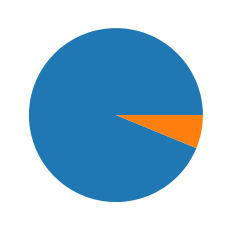

In [189]:
plt.pie(dados.total)

([<matplotlib.patches.Wedge at 0x29981472790>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

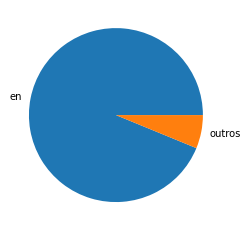

In [192]:
plt.pie(dados.total, labels = dados.lingua)

<AxesSubplot:xlabel='lingua', ylabel='total'>

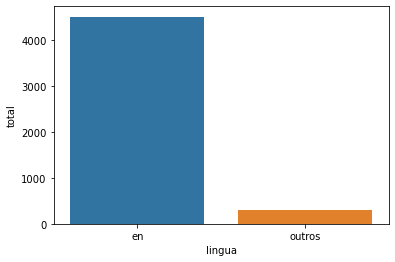

In [194]:
sns.barplot(x='lingua', y='total', data = dados)

In [200]:
tmdb.query("original_language != 'en'")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,90414,"[{""id"": 187056, ""name"": ""woman director""}]",fr,"I Love You, Don't Touch Me!","The story of a 25 year old virgin girl, lookin...",0.020839,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-01-21,0,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just Your Typical Boy-Loves-Girl Who Doesn't L...,"I Love You, Don't Touch Me!",6.0,1
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mistress, and ...",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1983-03-24,0,99.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,Gabriela,6.0,2
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of grueso

In [206]:
total_outros = tmdb.query("original_language != 'en'").original_language.value_counts() #conta as linguas DIFERENTES de EN

In [208]:
total_outros

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

In [222]:
total_outros.count() #me devolve a quantidade de linhas diferentes que eu tenho, de idiomas

36

In [210]:
filme_nao_ingles = tmdb.query("original_language != 'en'")

<Figure size 2520x576 with 0 Axes>

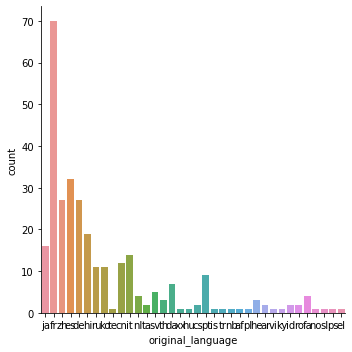

In [217]:
plt.figure(figsize=(35,8)) # NAO ESTÁ ENTRANDO. PQ?? -> o catplot é mais de alto nível e ignora essa função do eixo
#eu preciso usar alguma função do próprio catplot
sns.catplot(x="original_language", kind='count', data=filme_nao_ingles)

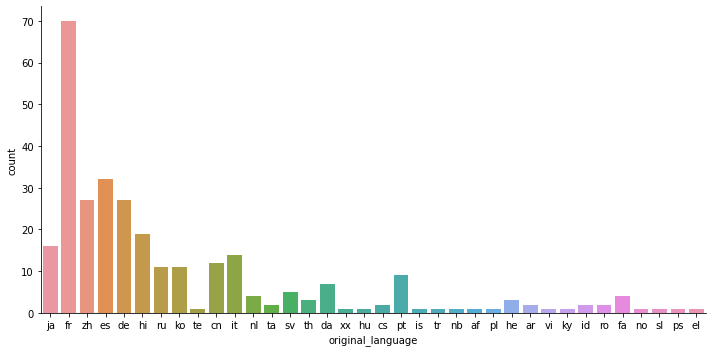

In [219]:
#vou usar o aspect [1 = quadrado, 2= retângulo]
sns.catplot(x="original_language", kind='count', data=filme_nao_ingles, aspect = 2)

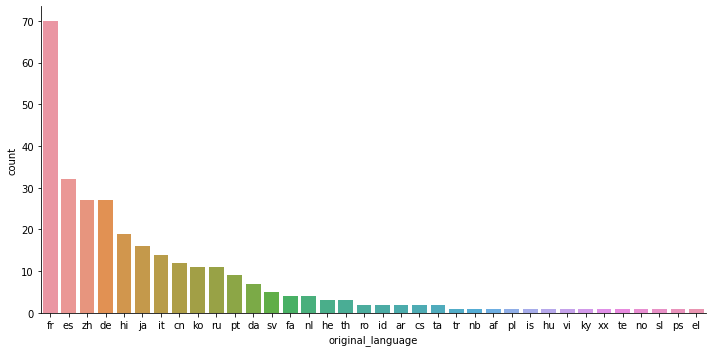

In [223]:
#Agora eu vou colocar na ordem. a ordem é o 
# índice dessa função tmdb.query("original_language != 'en'").original_language.value_counts()

sns.catplot(x="original_language", kind='count', data=filme_nao_ingles, aspect = 2, order = total_outros.index)

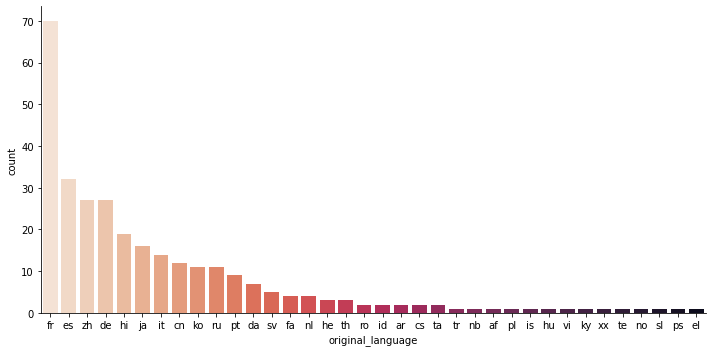

In [227]:
#mudar a paleta de cores 
# https://seaborn.pydata.org/tutorial/color_palettes.html
sns.catplot(x="original_language", kind='count', data=filme_nao_ingles, aspect = 2, order = total_outros.index, palette="rocket_r")